In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
from pprint import pprint

In [2]:
data_20406 = pd.read_csv('Resources/U20406.csv')
data_20306 = pd.read_csv('Resources/U20306.csv')
nondurable = pd.read_csv('Resources/nondurable_no_commas.csv')
durable = pd.read_csv('Resources/Durable-no-commas.csv')
# Remove white space from the left of the category names
nondurable['Consumption Category '] = nondurable['Consumption Category '].str.lstrip()
durable['Category'] = durable['Category'].str.lstrip()
# Display table
#nondurable.head()
durable.head()

Line                  Category  2019M01  2019M02  2019M03  2019M04  \
0     3             Durable goods  1489338  1476868  1517158  1520517   
1     4  Motor vehicles and parts   505405   493199   526990   520059   
2     5   New motor vehicles (55)   270156   265172   284806   280681   
3     6                 New autos    63697    56758    57492    59422   
4     7        New domestic autos    47043    40898    42353    44414   

   2019M05  2019M06  2019M07  2019M08  ...  2019M12  2020M01  2020M02  \
0  1539628  1547807  1546742  1550766  ...  1554348  1567879  1552496   
1   526272   528448   521973   522425  ...   531252   528205   514181   
2   288288   291327   285982   285932  ...   294780   294499   281780   
3    54490    57520    53191    53766  ...    56344    52768    50961   
4    39057    41172    37958    39130  ...    42835    39269    37692   

   2020M03  2020M04  2020M05  2020M06  2020M07  2020M08  2020M09  
0  1368958  1199629  1548706  1686563  1725182  1741183  1792575  
1   411296   367912   527916   558120   573695   585999   621299  
2   218323   205918   280194   284637   296850   306311   334157  
3    37935    29443    40283    42026    48762    49953    53258  
4    29809    23131    29548    31416    37762    38988    41450  

[5 rows x 23 columns]

In [3]:
# Separate durable goods into years
data19 = nondurable.loc[:, ['Consumption Category ', '2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06', '2019M07', '2019M08', '2019M09']]
#data19.dtypes

data20 = nondurable.loc[:, ['Consumption Category ', '2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06', '2020M07', '2020M08', '2020M09']]
#data20.dtypes

# Separate non-durable goods into years
dur_data19 = durable.loc[:, ['Category', '2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06', '2019M07', '2019M08', '2019M09']]
dur_data19.dtypes

dur_data20 = durable.loc[:, ['Category', '2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06', '2020M07', '2020M08', '2020M09']]
dur_data20.dtypes

Category    object
2020M01      int64
2020M02      int64
2020M03      int64
2020M04      int64
2020M05      int64
2020M06      int64
2020M07      int64
2020M08      int64
2020M09      int64
dtype: object

In [4]:
# Compare alcohols
booze19 = data19.loc[(data19['Consumption Category '] == 'Spirits') | (data19['Consumption Category '] == 'Wine') | (data19['Consumption Category '] == 'Beer'), :]
booze19 = booze19.set_index('Consumption Category ')

booze20 = data20.loc[(data19['Consumption Category '] == 'Spirits') | (data19['Consumption Category '] == 'Wine') | (data19['Consumption Category '] == 'Beer'), :]
booze20 = booze20.set_index('Consumption Category ')

In [5]:
x_values = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']

spirits19, = plt.plot(x_values, booze19.loc['Spirits', :], label='Spirits 2019')
wine19, = plt.plot(x_values, booze19.loc['Wine', :], label='Wine 2019')
beer19, = plt.plot(x_values, booze19.loc['Beer', :], label='Beer 2019')

spirits20, = plt.plot(x_values, booze20.loc['Spirits', :], label='Spirits 2020')
wine20, = plt.plot(x_values, booze20.loc['Wine', :], label='Wine 2020')
beer20, = plt.plot(x_values, booze20.loc['Beer', :], label='Beer 2020')

plt.legend(handles=[spirits19, wine19, beer19, spirits20, wine20, beer20], loc="best")
plt.xticks(rotation=45)
plt.tight_layout()

In [48]:
# Compare recreational goods
dur_data19 = dur_data19.set_index('Category')
dur_data20 = dur_data20.set_index('Category')

data19 = data19.set_index('Consumption Category ')
data20 = data20.set_index('Consumption Category ')

#list(dur_data19.index)

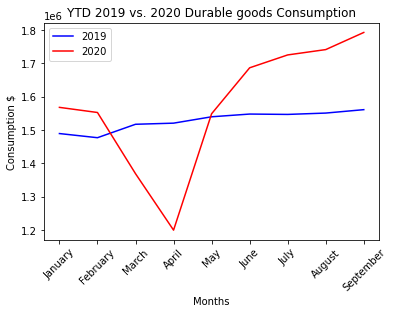

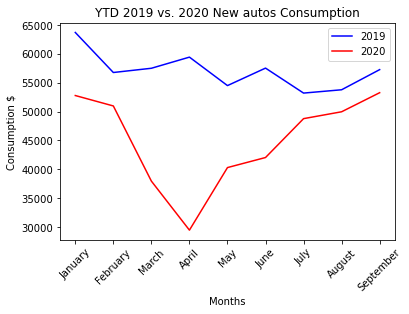

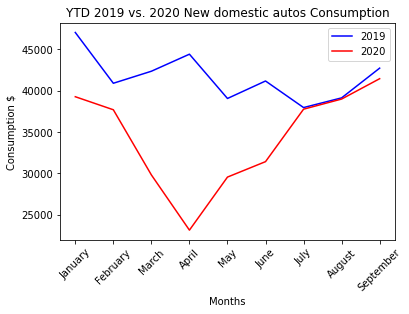

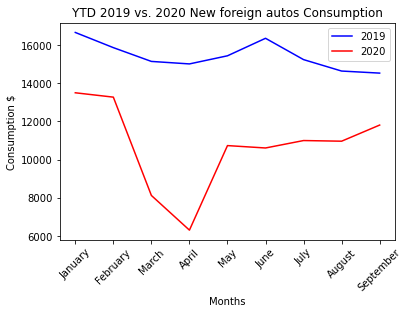

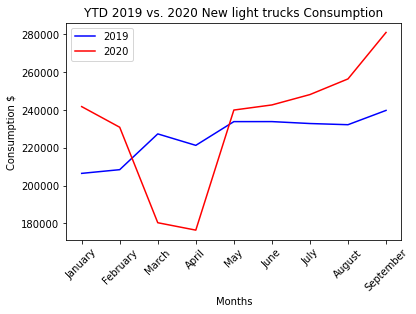

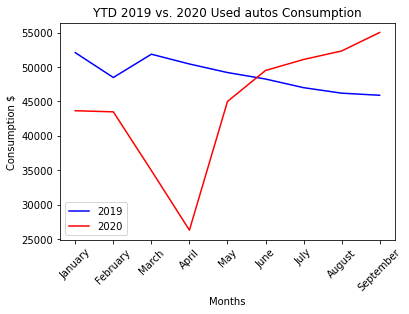

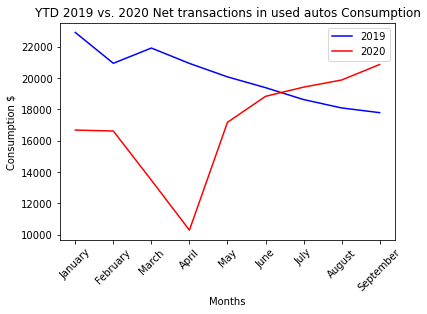

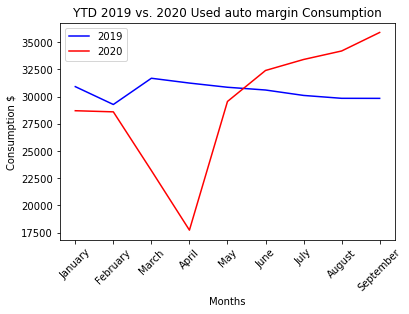

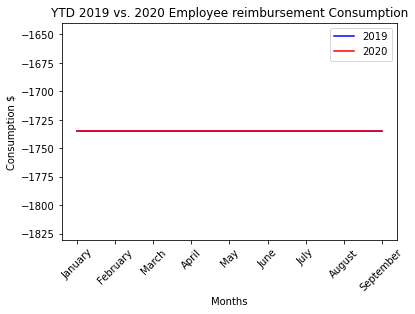

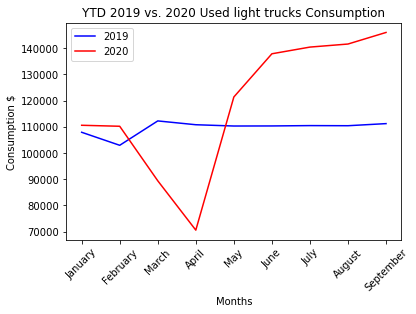

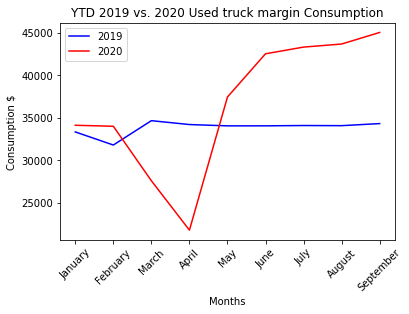

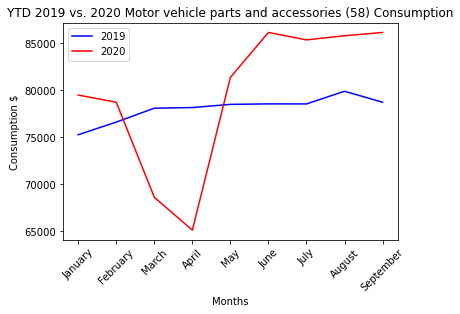

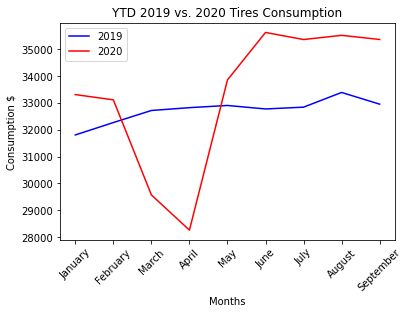

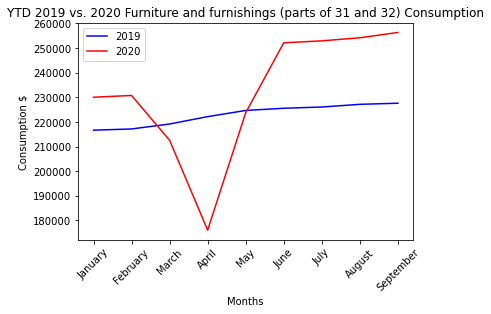

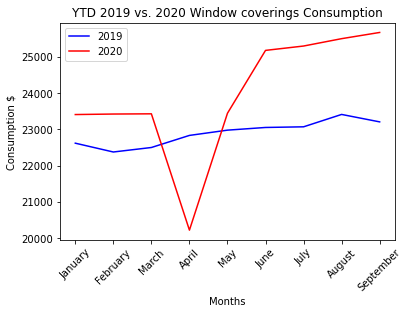

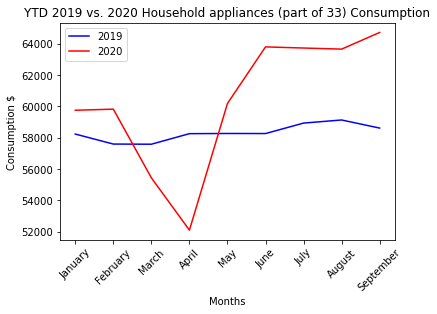

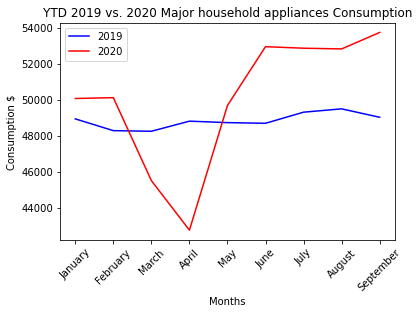

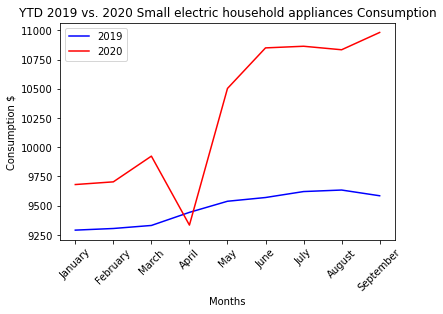

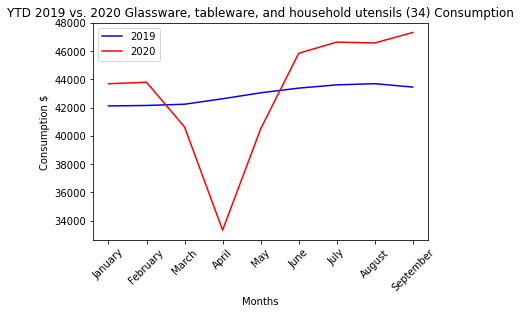

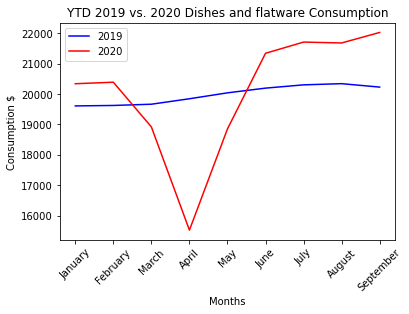

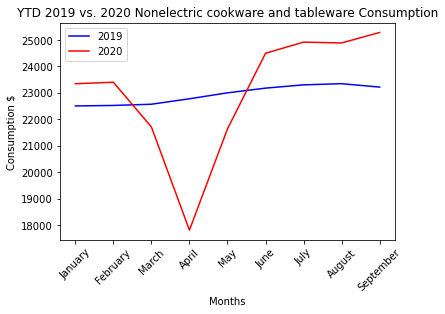

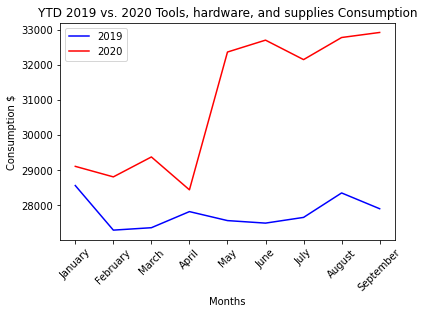

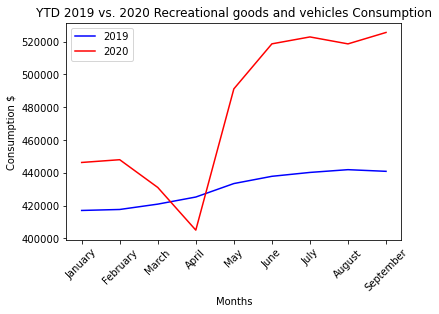

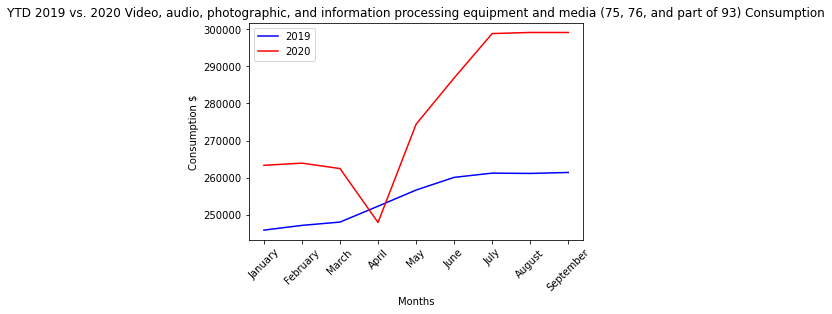

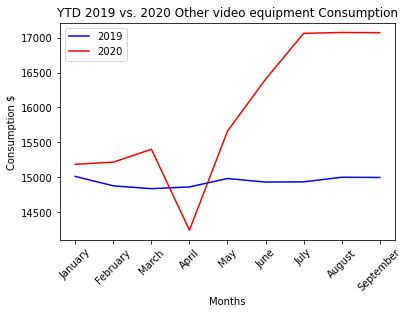

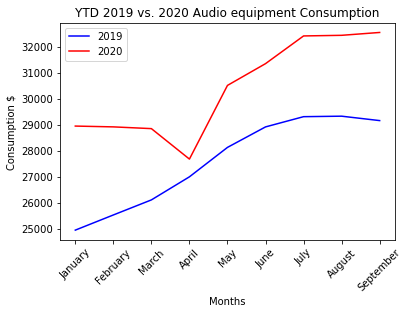

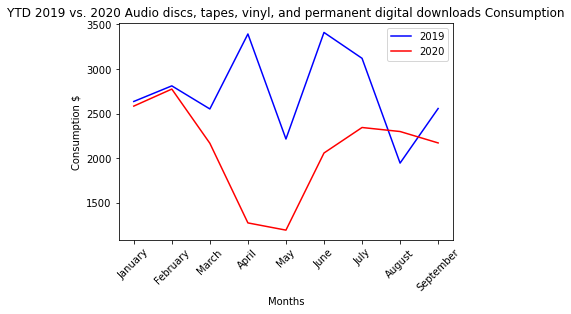

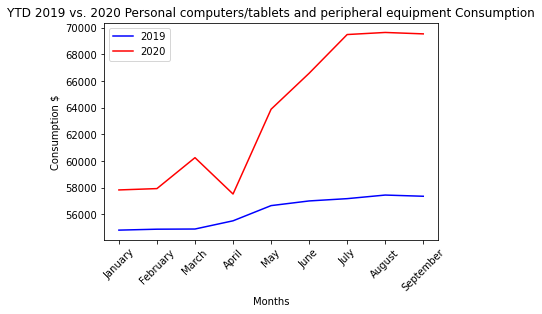

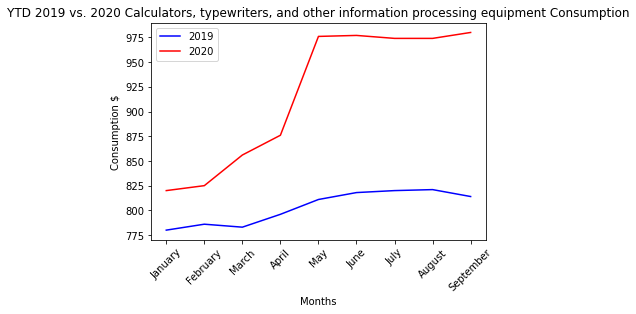

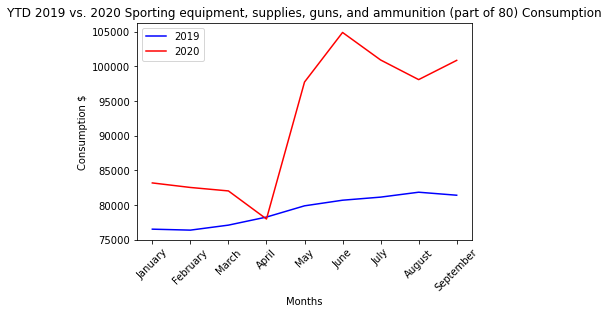

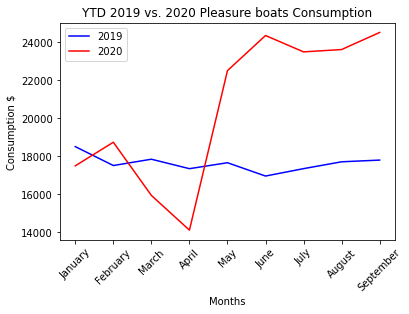

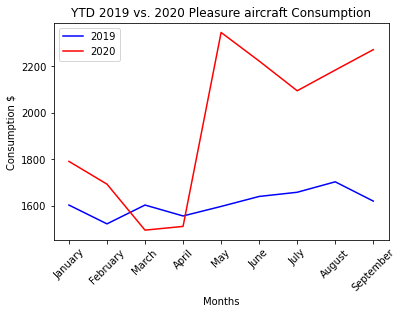

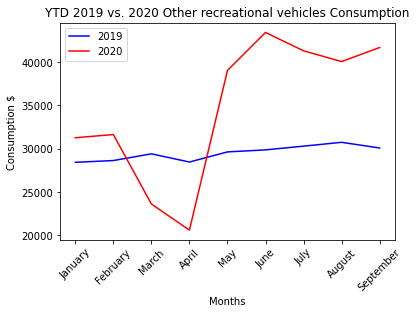

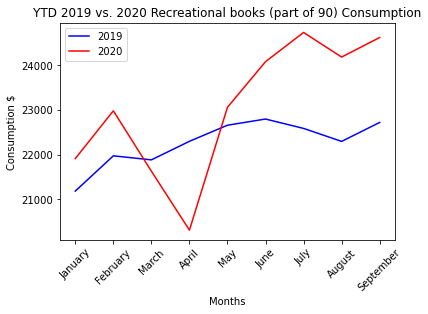

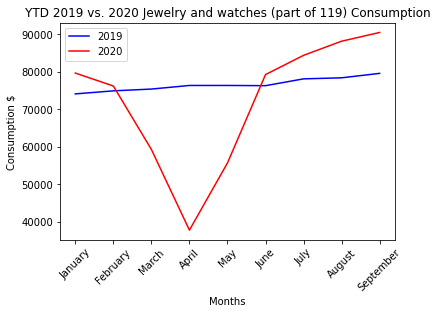

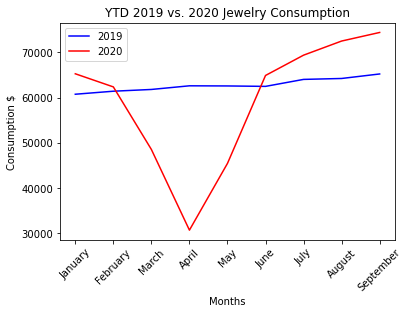

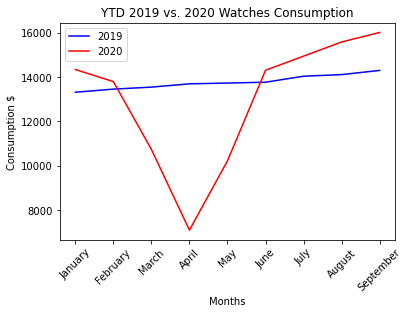

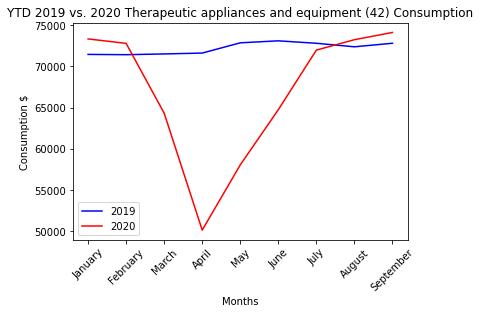

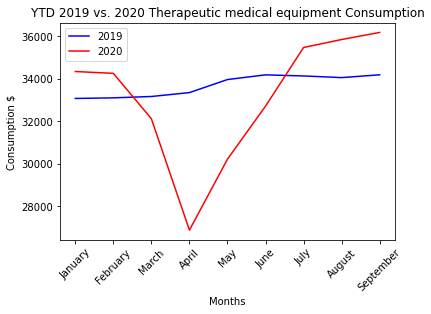

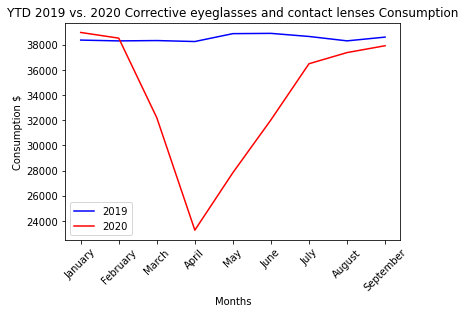

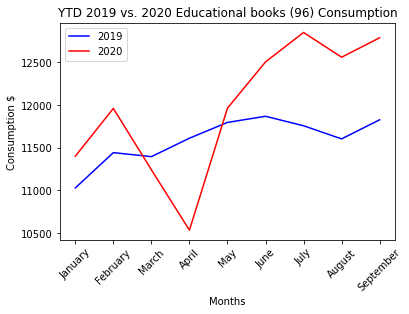

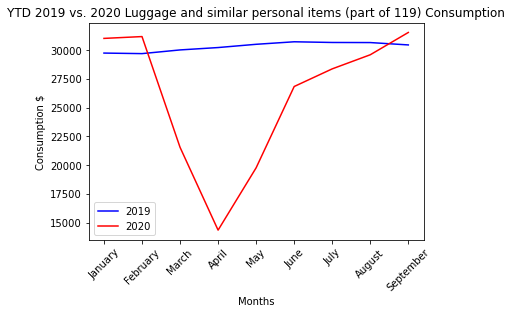

In [7]:
cat19 = dur_data19.index[0]
cat20 = dur_data20.index[0]

ytd19 = dur_data19.loc[cat19, :]
ytd20 = dur_data20.loc[cat20, :]

#dur_data19.columns

for index in dur_data19.index:
    ytd19 = dur_data19.loc[index, :]
    ytd20 = dur_data20.loc[index, :]
    
    plt.plot(x_values, ytd19, color='blue', label='2019')
    plt.plot(x_values, ytd20, color='red', label='2020')
    plt.legend(['2019','2020'], loc='best')
    plt.title(f'YTD 2019 vs. 2020 {index} Consumption')
    plt.xlabel('Months')
    plt.ylabel('Consumption $')
    plt.xticks(rotation=45)
    plt.show()

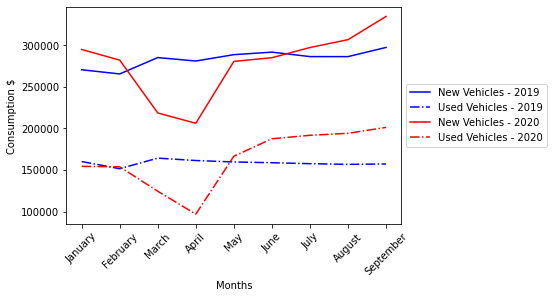

In [8]:
# Plot Cars

cars19 = dur_data19.loc[(dur_data19.index == 'New motor vehicles (55)') | (dur_data19.index == 'Net purchases of used motor vehicles (56)'), :]

cars20 = dur_data20.loc[(dur_data20.index == 'New motor vehicles (55)') | (dur_data20.index == 'Net purchases of used motor vehicles (56)'), :]

plt.plot(x_values, cars19.loc['New motor vehicles (55)',:], color='blue', label='New Vehicles - 2019')
plt.plot(x_values, cars19.loc['Net purchases of used motor vehicles (56)',:], linestyle='-.', color='blue', label='Used Vehicles - 2019')
plt.plot(x_values, cars20.loc['New motor vehicles (55)',:], color='red', label='New Vehicles - 2020')
plt.plot(x_values, cars20.loc['Net purchases of used motor vehicles (56)',:], linestyle='-.', color='red', label='Used Vehicles - 2020')
plt.xlabel('Months')
plt.ylabel('Consumption $')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

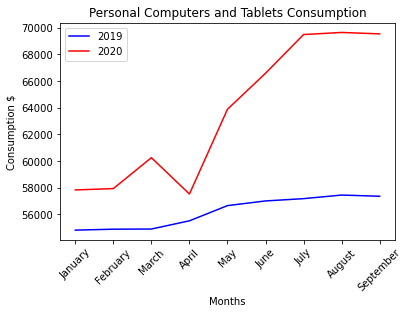

In [65]:
ent19 = dur_data19.loc[(dur_data19.index == 'Televisions') | (dur_data19.index == 'Personal computers/tablets and peripheral equipment') | (dur_data19.index == 'Audio equipment'), :]

ent20 = dur_data20.loc[(dur_data20.index == 'Televisions') | (dur_data20.index == 'Personal computers/tablets and peripheral equipment') | (dur_data20.index == 'Audio equipment'), :]

# plt.plot(x_values, ent19.loc['Televisions',:], color='blue', label='Televisions - 2019')
plt.plot(x_values, ent19.loc['Personal computers/tablets and peripheral equipment',:], color='blue', label='Personal Computers and Tablets - 2019')
# plt.plot(x_values, ent19.loc['Audio equipment',:], linestyle=':', color='blue', label='Audio Equipment - 2019')
# plt.plot(x_values, ent20.loc['Televisions',:], color='red', label='Televisions - 2020')
plt.plot(x_values, ent20.loc['Personal computers/tablets and peripheral equipment',:], color='red', label='Personal Computers and Tablets - 2020')
# plt.plot(x_values, ent20.loc['Audio equipment',:], linestyle=':', color='red', label='Audio Equipment - 2020')
plt.xlabel('Months')
plt.ylabel('Consumption $')
plt.title('Personal Computers and Tablets Consumption')
plt.xticks(rotation=45)
plt.legend(['2019','2020'], loc='best')
plt.savefig('Images/PersonalComputers20v19.png')

In [25]:
x_reg_values = np.linspace(0,1,len(ent19.loc['Televisions',:]))
y_values = ent19.loc['Televisions',:].astype('int')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg_values, y_values)
regress_values = x_reg_values * slope + intercept
line_eq = "2019 Televisions: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'2019 Televisions: y = 1794.27x + 33367.42'

In [26]:
x_reg_values = np.linspace(0,1,len(ent20.loc['Televisions',:]))
y_values = ent20.loc['Televisions',:].astype('int')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg_values, y_values)
regress_values = x_reg_values * slope + intercept
line_eq = "2020 Televisions: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'2020 Televisions: y = 2590.67x + 32975.22'

In [27]:
x_reg_values = np.linspace(0,1,len(ent19.loc['Personal computers/tablets and peripheral equipment',:]))
y_values = ent19.loc['Personal computers/tablets and peripheral equipment',:].astype('int')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg_values, y_values)
regress_values = x_reg_values * slope + intercept
line_eq = "2019 Personal Computers and Tablets: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'2019 Personal Computers and Tablets: y = 3180.93x + 54614.76'

In [28]:
x_reg_values = np.linspace(0,1,len(ent20.loc['Personal computers/tablets and peripheral equipment',:]))
y_values = ent20.loc['Personal computers/tablets and peripheral equipment',:].astype('int')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg_values, y_values)
regress_values = x_reg_values * slope + intercept
line_eq = "2020 Personal Computers and Tablets: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'2020 Personal Computers and Tablets: y = 14576.67x + 56340.56'

In [29]:
x_reg_values = np.linspace(0,1,len(ent19.loc['Audio equipment',:]))
y_values = ent19.loc['Audio equipment',:].astype('int')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg_values, y_values)
regress_values = x_reg_values * slope + intercept
line_eq = "2019 Audio Equipment: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'2019 Audio Equipment: y = 4882.13x + 25157.6'

In [30]:
x_reg_values = np.linspace(0,1,len(ent20.loc['Audio equipment',:]))
y_values = ent20.loc['Audio equipment',:].astype('int')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg_values, y_values)
regress_values = x_reg_values * slope + intercept
line_eq = "2020 Audio Equipment: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'2020 Audio Equipment: y = 4774.8x + 28018.71'

In [31]:
# Cars vs. Recreational Vehicles
#fig, ax1, ax2 = plt.subplots(1,3)

plt.plot(x_values, dur_data19.loc['Motor vehicles and parts',:], color='blue', label='Motor Vehicles - 2019')
plt.plot(x_values, dur_data20.loc['Motor vehicles and parts',:], color='red', label='Motor Vehicles - 2020')


plt.xlabel('Months')
plt.ylabel('Consumption $')
plt.title('Motor Vehicle Purchases')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [36]:
# Motorcycles
plt.plot(x_values, dur_data19.loc['Motorcycles',:], color='blue', label='Motorcycles - 2019')
plt.plot(x_values, dur_data20.loc['Motorcycles',:], color='red', label='Motorcycles - 2020')

plt.xlabel('Months')
plt.ylabel('Consumption $')
plt.title('Motorcycle Purchases')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

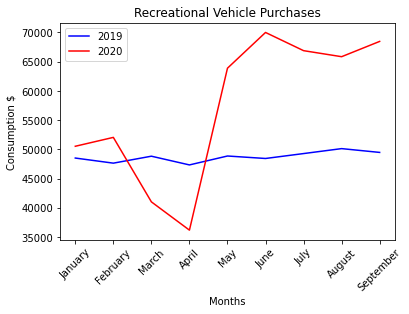

In [64]:
plt.plot(x_values, dur_data19.loc['Pleasure boats, aircraft, and other recreational vehicles',:], color='blue', label='Recreational Vehicles - 2019')
plt.plot(x_values, dur_data20.loc['Pleasure boats, aircraft, and other recreational vehicles',:], color='red', label='Recreational Vehicles - 2020')

plt.xlabel('Months')
plt.ylabel('Consumption $')
plt.title('Recreational Vehicle Purchases')
plt.xticks(rotation=45)
plt.legend(['2019','2020'], loc='best')
plt.savefig('Images/RecreationalVehicles20v19.png')

In [34]:
# Major Appliances

plt.plot(x_values, dur_data19.loc['Major household appliances',:], color='blue', label='Major Appliances - 2019')
plt.plot(x_values, dur_data20.loc['Major household appliances',:], color='red', label='Major Appliances - 2020')

plt.xlabel('Months')
plt.ylabel('Consumption $')
plt.title('Major Appliance Purchases')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

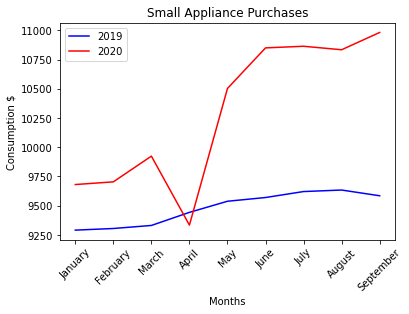

In [63]:
# Small electronic goods
plt.plot(x_values, dur_data19.loc['Small electric household appliances',:], color='blue', label='Small Appliances - 2019')
plt.plot(x_values, dur_data20.loc['Small electric household appliances',:], color='red', label='Small Appliances - 2020')

plt.xlabel('Months')
plt.ylabel('Consumption $')
plt.title('Small Appliance Purchases')
plt.xticks(rotation=45)
plt.legend(['2019','2020'], loc='best')
plt.savefig('Images/SmallAppliances20v19.png')

In [62]:

plt.plot(x_values, dur_data19.loc['Sporting equipment, supplies, guns, and ammunition (part of 80)',:], color='blue', label='Sporting Equipment, Guns, Ammunition - 2019')
plt.plot(x_values, dur_data20.loc['Sporting equipment, supplies, guns, and ammunition (part of 80)',:], color='red', label='Sporting Equipment, Guns, Ammunition - 2020')

plt.xlabel('Months')
plt.ylabel('Consumption $')
plt.title('Sporting Equipment, Guns, Ammunition Purchases')
plt.xticks(rotation=45)
plt.legend(['2019','2020'], loc='best')
plt.savefig('Images/SportsGunsAmmo20v19.png')

In [42]:
x_reg_values = np.linspace(0,1,len(dur_data19.loc['Sporting equipment, supplies, guns, and ammunition (part of 80)',:]))
y_values = dur_data19.loc['Sporting equipment, supplies, guns, and ammunition (part of 80)',:].astype('int')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg_values, y_values)
regress_values = x_reg_values * slope + intercept
line_eq = "2019 Sporting Equipment, Guns, Ammunition: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'2019 Sporting Equipment, Guns, Ammunition: y = 6199.07x + 76163.02'

In [41]:
x_reg_values = np.linspace(0,1,len(dur_data20.loc['Sporting equipment, supplies, guns, and ammunition (part of 80)',:]))
y_values = dur_data20.loc['Sporting equipment, supplies, guns, and ammunition (part of 80)',:].astype('int')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg_values, y_values)
regress_values = x_reg_values * slope + intercept
line_eq = "2020 Sporting Equipment, Guns, Ammunition: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'2020 Sporting Equipment, Guns, Ammunition: y = 24271.73x + 79902.69'

In [49]:
# This is non-durable recreational purchases
plt.plot(x_values, data19.loc['Games toys and hobbies',:], color='blue', label='Games, Toys, Hobbies - 2019')
plt.plot(x_values, data20.loc['Games toys and hobbies',:], color='red', label='Games, Toys, Hobbies - 2020')

plt.xlabel('Months')
plt.ylabel('Consumption $')
plt.title('Games, Toys, Hobbies Purchases')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [50]:
x_reg_values = np.linspace(0,1,len(data19.loc['Games toys and hobbies',:]))
y_values = data19.loc['Games toys and hobbies',:].astype('int')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg_values, y_values)
regress_values = x_reg_values * slope + intercept
line_eq = "2019 Games, Toys, and Hobbies: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'2019 Games, Toys, and Hobbies: y = 12150.4x + 120474.24'

In [51]:
x_reg_values = np.linspace(0,1,len(data20.loc['Games toys and hobbies',:]))
y_values = data20.loc['Games toys and hobbies',:].astype('int')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_reg_values, y_values)
regress_values = x_reg_values * slope + intercept
line_eq = "2020 Games, Toys, and Hobbies: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'2020 Games, Toys, and Hobbies: y = 52122.67x + 133118.44'

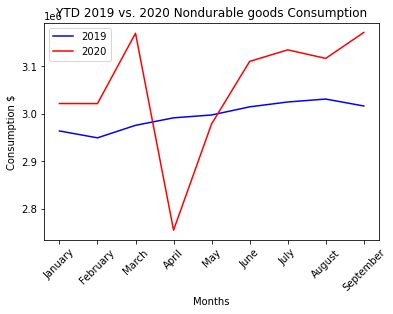

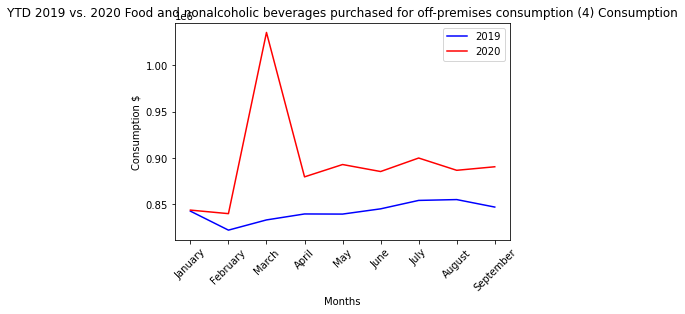

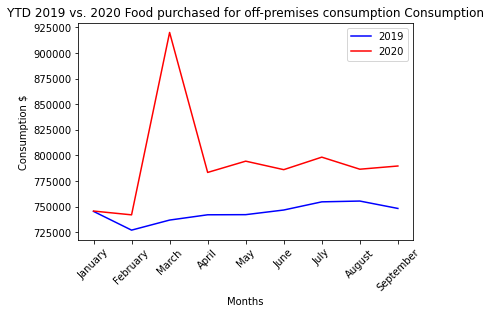

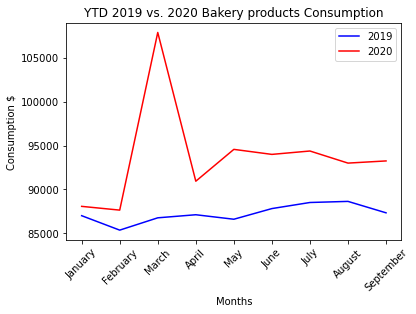

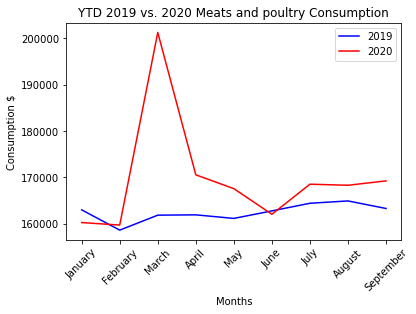

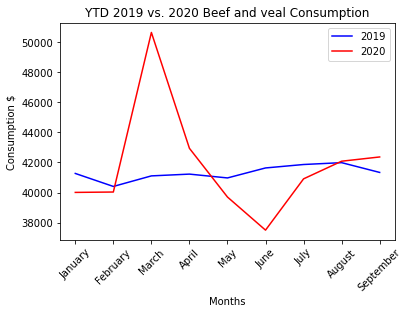

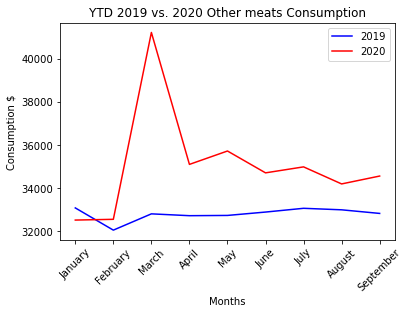

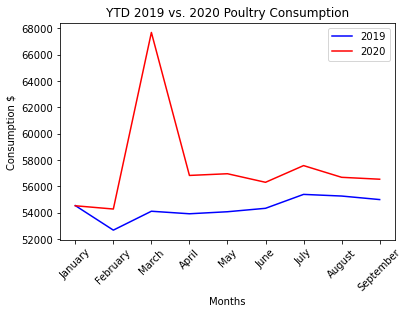

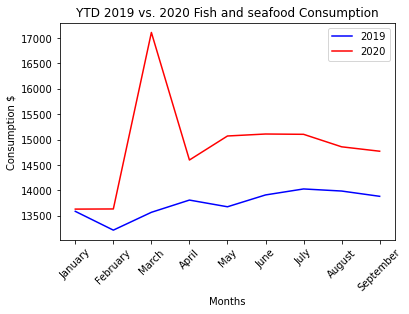

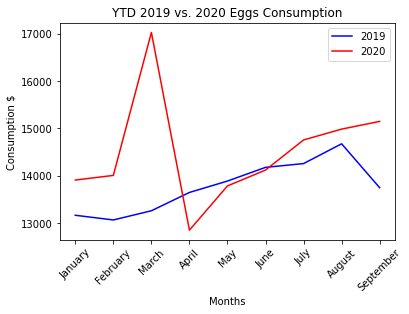

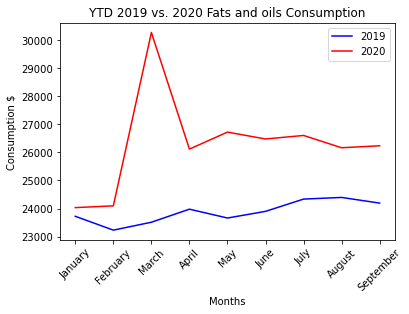

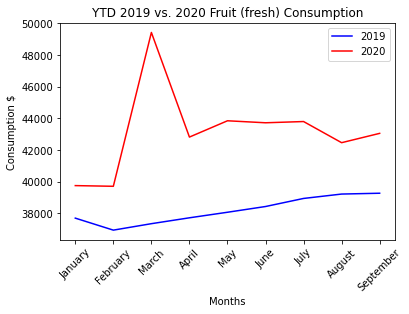

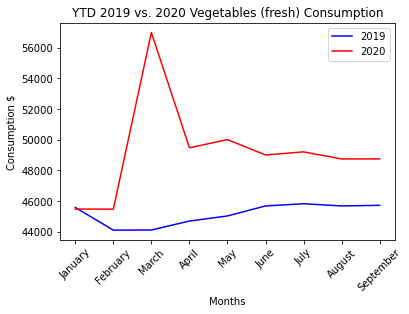

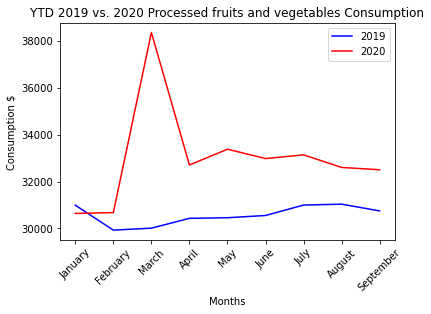

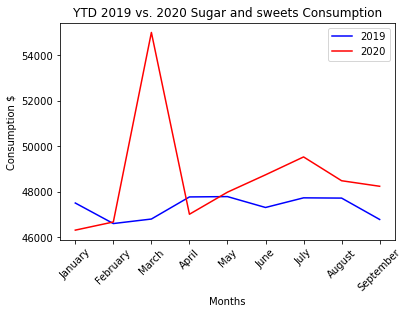

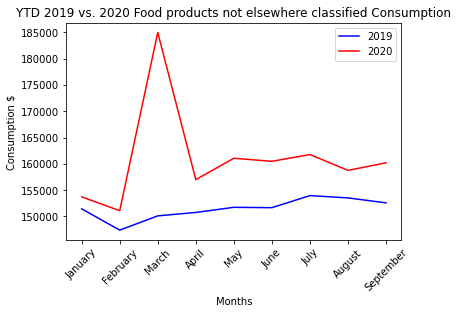

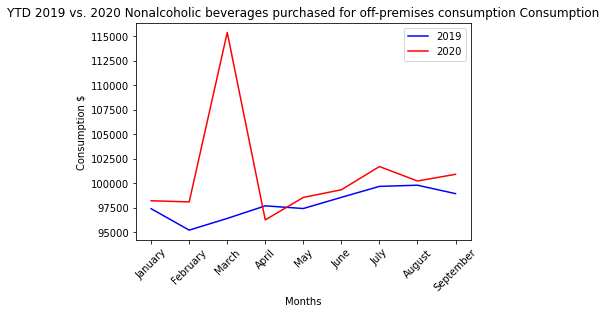

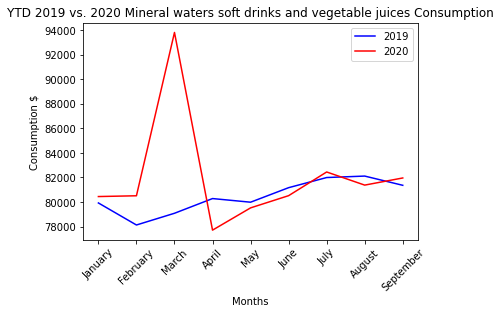

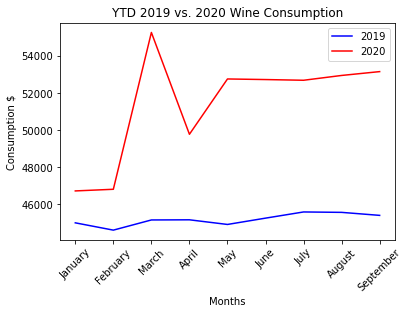

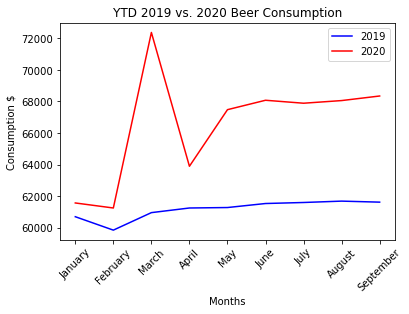

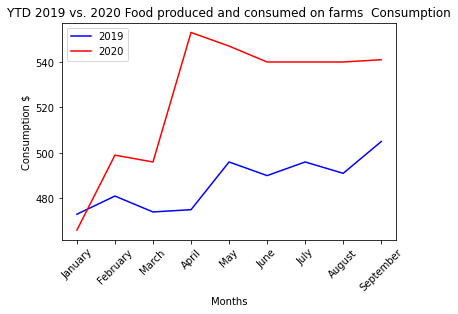

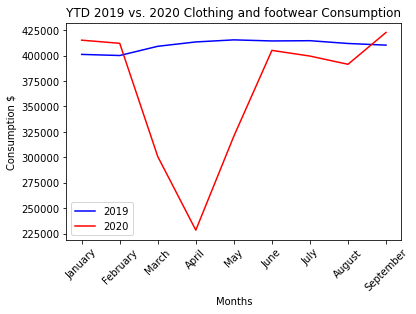

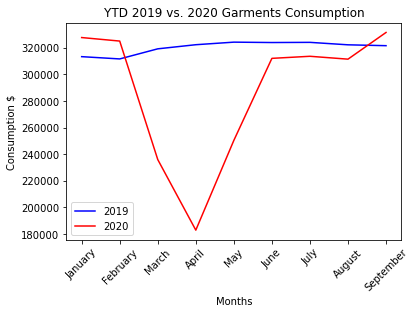

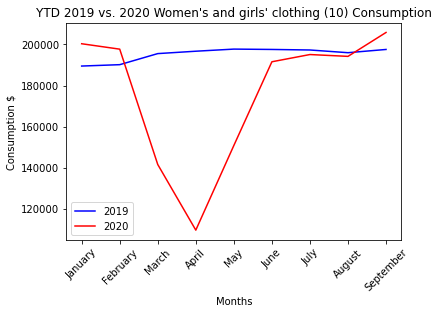

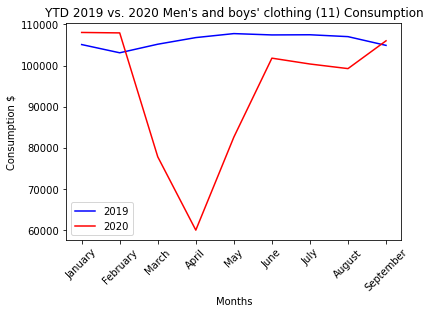

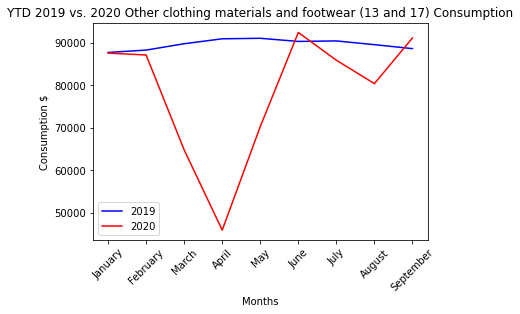

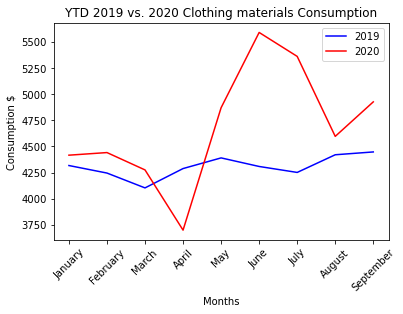

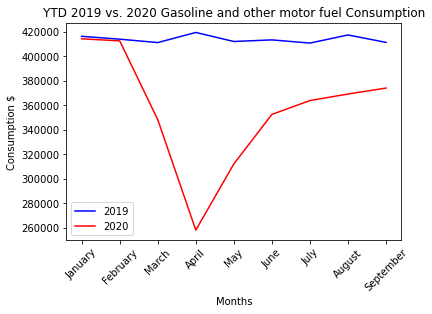

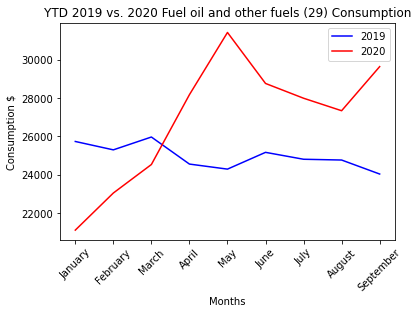

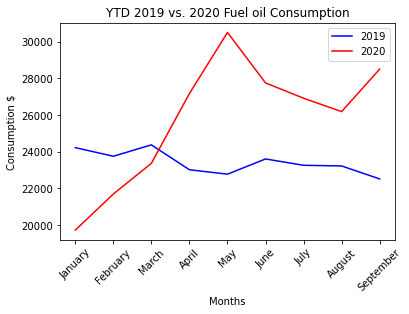

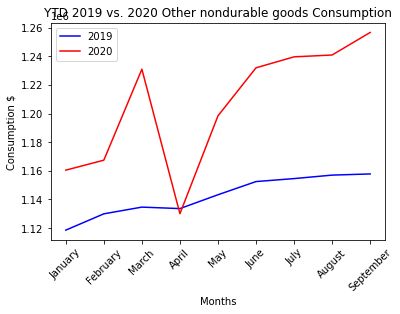

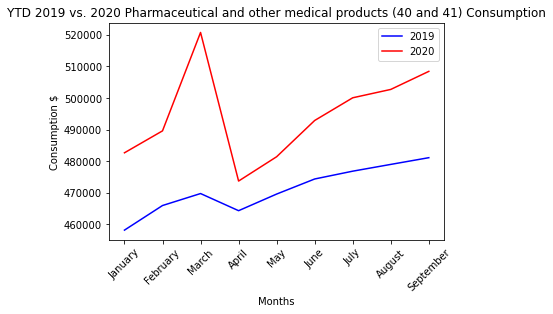

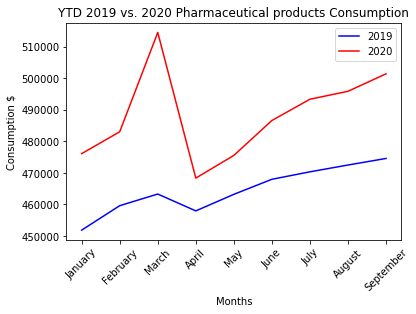

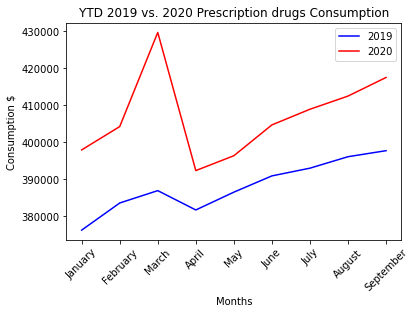

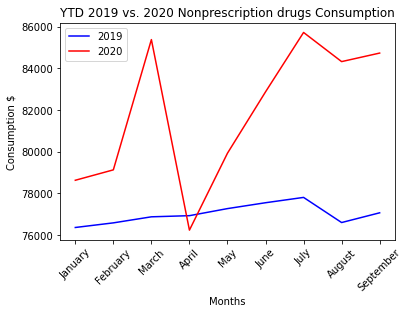

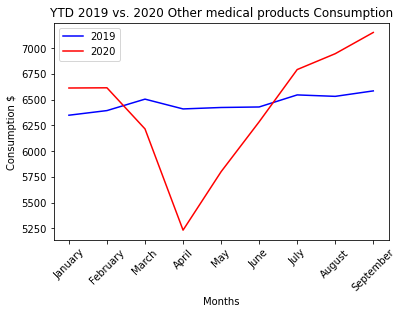

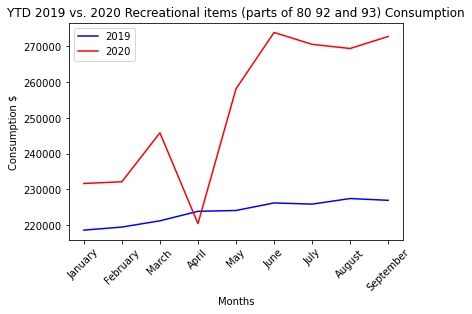

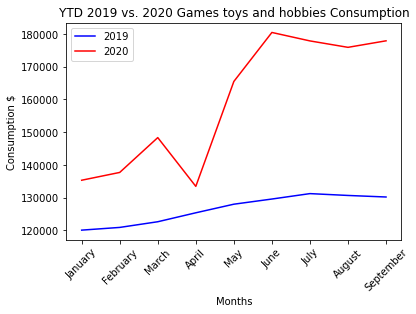

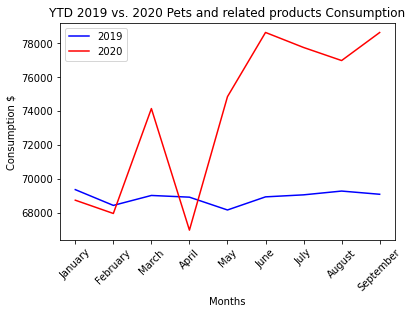

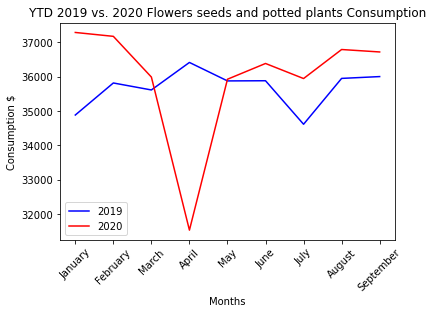

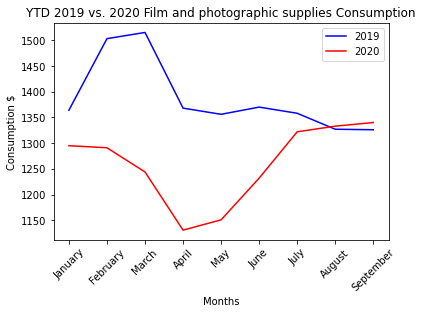

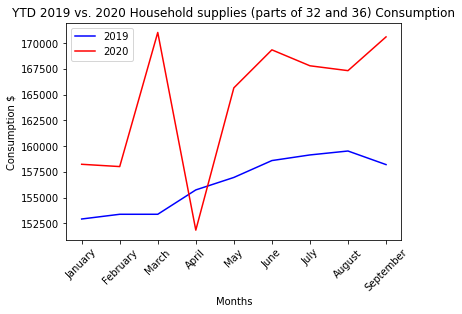

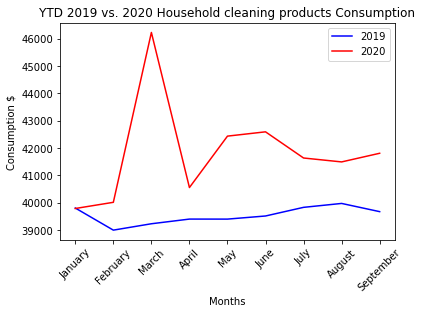

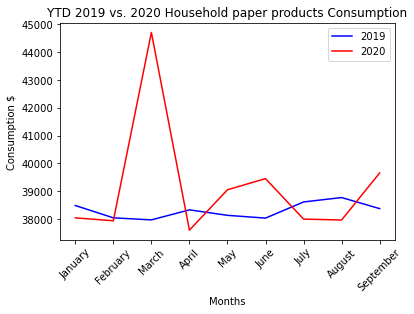

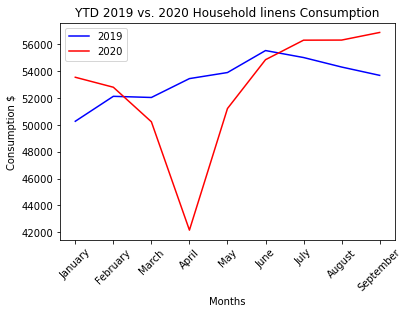

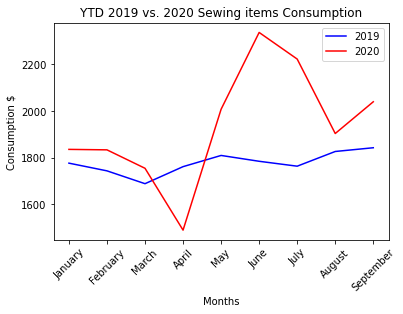

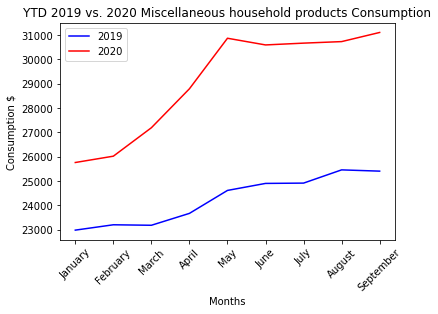

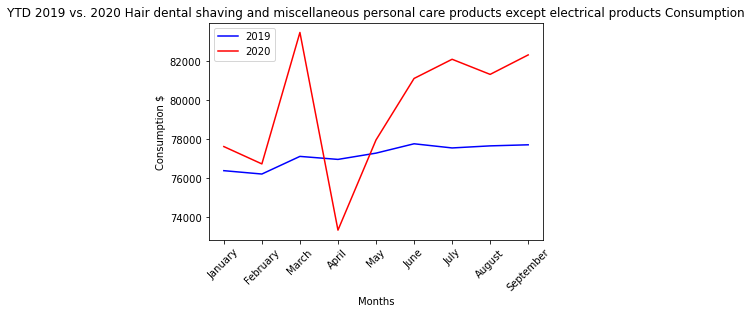

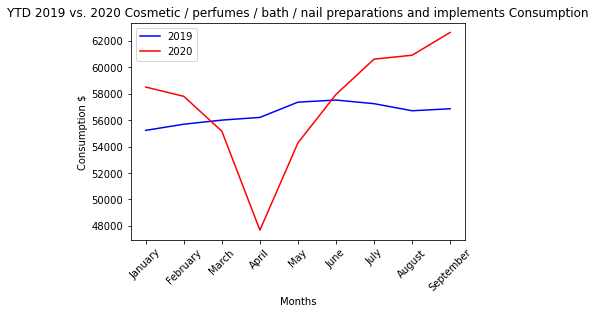

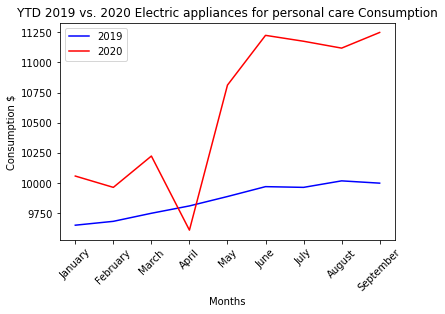

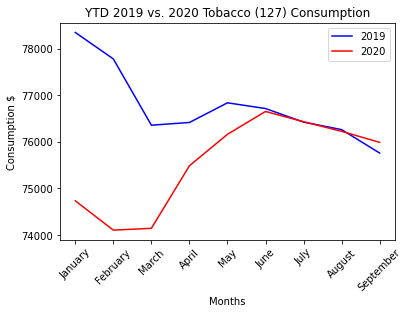

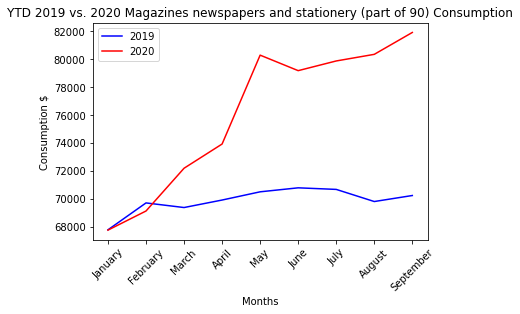

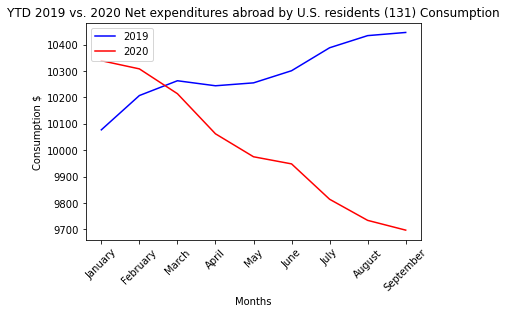

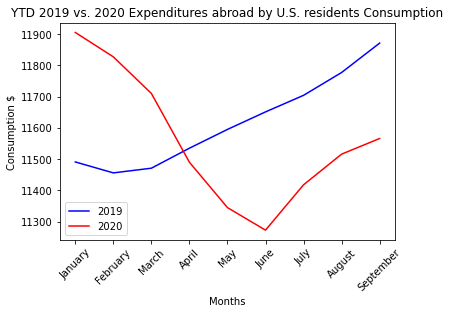

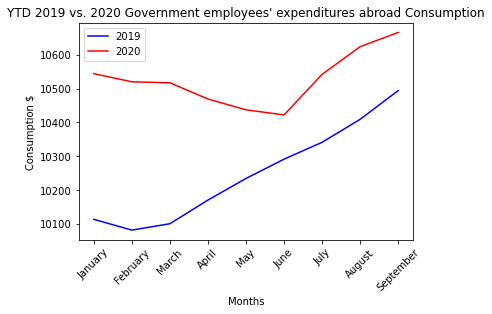

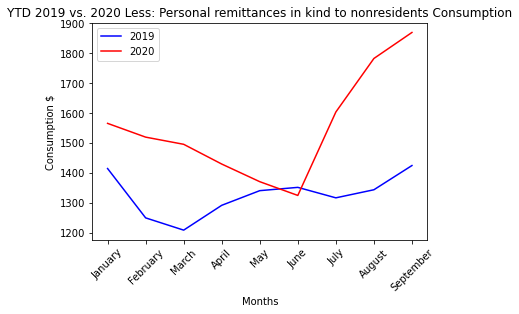

In [52]:
cat19 = data19.index[0]
cat20 = data20.index[0]

ytd19 = data19.loc[cat19, :]
ytd20 = data20.loc[cat20, :]

#dur_data19.columns

for index in data19.index:
    ytd19 = data19.loc[index, :]
    ytd20 = data20.loc[index, :]
    
    plt.plot(x_values, ytd19, color='blue', label='2019')
    plt.plot(x_values, ytd20, color='red', label='2020')
    plt.legend(['2019','2020'], loc='best')
    plt.title(f'YTD 2019 vs. 2020 {index} Consumption')
    plt.xlabel('Months')
    plt.ylabel('Consumption $')
    plt.xticks(rotation=45)
    plt.show()

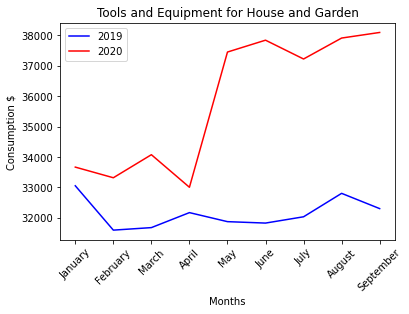

In [61]:

plt.plot(x_values, dur_data19.loc['Tools and equipment for house and garden (35)',:], color='blue', label='Tools and Equipment for House and Garden - 2019')
plt.plot(x_values, dur_data20.loc['Tools and equipment for house and garden (35)',:], color='red', label='Tools and Equipment for House and Garden - 2020')

plt.xlabel('Months')
plt.ylabel('Consumption $')
plt.title('Tools and Equipment for House and Garden')
plt.xticks(rotation=45)
plt.legend(['2019','2020'], loc='best')
plt.savefig('Images/HouseGardenEquip20v19.png')